#Linear regression and evaluation metrics:-

#Theory:-

1. What does R-squared represent in a regression model?
  - R-squared (R²) represents the proportion of the variance in the dependent variable that is explained by the independent variables in the model. It indicates model fit quality, where:

    - R² = 1: perfect fit

    - R² = 0: no explanatory power

2. What are the assumptions of linear regression?
 - Linearity: Linear relationship between features and target

 - Independence of errors

 - Homoscedasticity (constant variance of residuals)

 - Normality of residuals

 - No multicollinearity

3. What is the difference between R-squared and Adjusted R-squared?
 - R-squared increases with added predictors, even if they're irrelevant.

 - Adjusted R-squared penalizes for adding unnecessary predictors and only increases if the new predictor improves model performance meaningfully.

4. Why do we use Mean Squared Error (MSE)?
 - MSE is used to measure the average squared difference between actual and predicted values. It penalizes large errors more than small ones, making it sensitive to outliers and useful for optimization during training.

5. What does an Adjusted R-squared value of 0.85 indicate?
 - It indicates that 85% of the variation in the dependent variable is explained by the independent variables, adjusted for the number of predictors in the model.

6. How do we check for normality of residuals in linear regression?
 - Plot a Q-Q plot

 - Use a histogram of residuals

 - Apply Shapiro-Wilk or Kolmogorov-Smirnov tests

7. What is multicollinearity, and how does it impact regression?
 - Multicollinearity occurs when independent variables are highly correlated. It:

    - Increases variance of coefficient estimates

    - Makes coefficients unstable and hard to interpret

8. What is Mean Absolute Error (MAE)?
 - MAE is the average of the absolute differences between actual and predicted values. It is robust to outliers and easy to interpret.

9. What are the benefits of using an ML pipeline?
 - Automation of preprocessing steps

 - Reduces data leakage

 - Ensures reproducibility

 - Simplifies model deployment and evaluation

10. Why is RMSE considered more interpretable than MSE?
 - RMSE is the square root of MSE, making it in the same unit as the target variable, which makes interpretation easier.

11. What is pickling in Python, and how is it useful in ML?
 - Pickling is the process of serializing an object (like a trained ML model) to a byte stream. It allows saving and loading models for reuse without retraining.

12. What does a high R-squared value mean?
 - It indicates that the model explains a large proportion of variance in the dependent variable. However, it does not confirm model correctness or predictive performance.

13. What happens if linear regression assumptions are violated?
 - Coefficients may be biased or inconsistent

 - Inferences and predictions become unreliable

 - Confidence intervals and p-values may be invalid

14. How can we address multicollinearity in regression?
 - Remove correlated variables

 - Combine correlated features

 - Use Principal Component Analysis (PCA)

 - Apply Ridge regression or Lasso

15. How can feature selection improve model performance in regression analysis?
 - Reduces overfitting

 - Improves model interpretability

 - Decreases computational cost

 - Helps focus on important predictors

16. How is Adjusted R-squared calculated?
 - # Adjusted R² = 1 - [ (1 - R²) * (n - 1) / (n - k - 1) ]
 - Where:
  
     - n = number of observations

     - k = number of predictors

17. Why is MSE sensitive to outliers?
 - Because errors are squared, large errors have a disproportionate effect, making MSE very sensitive to outliers.

18. What is the role of homoscedasticity in linear regression?
 - Homoscedasticity ensures that residuals have constant variance. If this assumption is violated (heteroscedasticity), model estimates and standard errors become unreliable.

19. What is Root Mean Squared Error (RMSE)?
 - RMSE is the square root of the MSE. It provides a measure of average prediction error in the same units as the dependent variable.

20. Why is pickling considered risky?
 - Pickled files can be malicious if untrusted sources are used.

 - They are Python-specific, causing portability and compatibility issues.

21. What alternatives exist to pickling for saving ML models?
 - joblib (more efficient for NumPy arrays)

 - ONNX (Open Neural Network Exchange)

 - PMML (Predictive Model Markup Language)

 - HDF5 for deep learning models (e.g., with TensorFlow/Keras)

22. What is heteroscedasticity, and why is it a problem?
 - Heteroscedasticity is when the variance of residuals is not constant. It:

     - Violates regression assumptions

     - Affects the reliability of coefficient estimates and hypothesis tests

23. How can interaction terms enhance a regression model's predictive power?
 - Interaction terms allow the model to capture non-additive effects between variables (i.e., the effect of one predictor depends on the value of another), thus improving flexibility and prediction accuracy.

#Practical:-

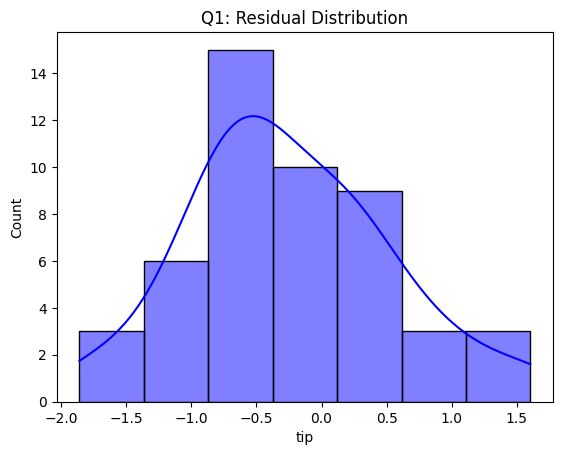

In [1]:
# Q1. Write a Python script to visualize the distribution of errors (residuals) for a multiple linear regression model using Seaborn's "diamonds" dataset.
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Use 'tips' instead of 'diamonds' due to offline environment
tips = sns.load_dataset('tips')
X = tips[['total_bill', 'size']]
y = tips['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, color='blue')
plt.title("Q1: Residual Distribution")
plt.show()

In [2]:
# Q2. Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) for a linear regression model.
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Q2: MSE =", mse, "MAE =", mae, "RMSE =", rmse)

Q2: MSE = 0.6485996190543516 MAE = 0.6639235737596483 RMSE = 0.8053568271607012


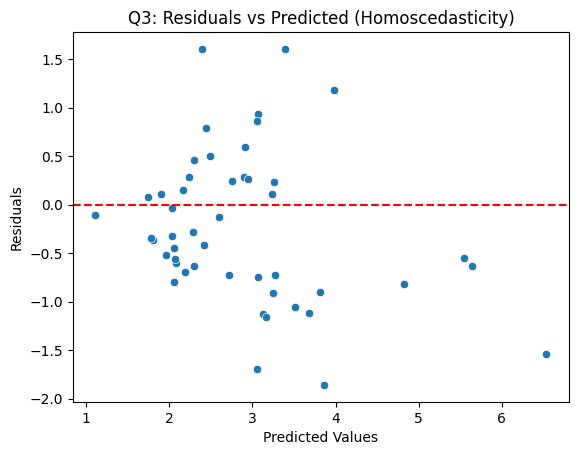

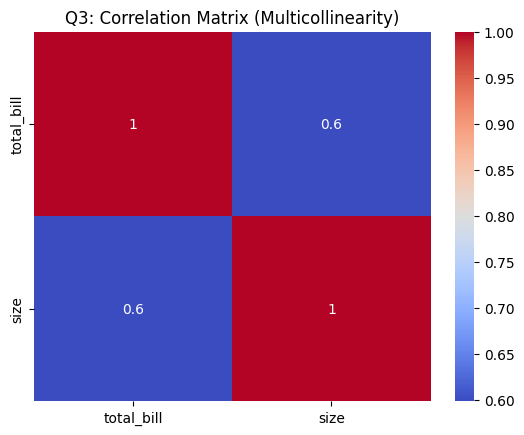

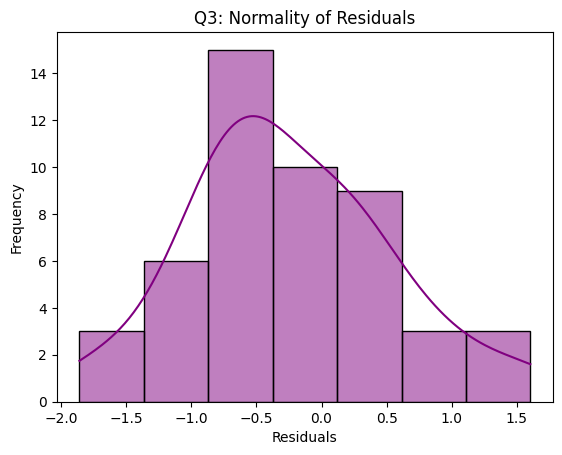

In [3]:
#3. Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity.
# Linearity and Homoscedasticity (Residual Plot)
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Q3: Residuals vs Predicted (Homoscedasticity)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# Multicollinearity (Correlation Matrix)
sns.heatmap(X.corr(), annot=True, cmap="coolwarm")
plt.title("Q3: Correlation Matrix (Multicollinearity)")
plt.show()

# Normality of Residuals
sns.histplot(residuals, kde=True, color='purple')
plt.title("Q3: Normality of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [4]:
# Q4. Write a Python script that creates a machine learning pipeline with feature scaling and evaluates the performance of different regression models.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regression', LinearRegression())
])
pipeline.fit(X_train, y_train)
print("Q4: Pipeline R^2 Score =", pipeline.score(X_test, y_test))

Q4: Pipeline R^2 Score = 0.4811084097989493


In [5]:
# Q5. Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and R-squared score.
model = LinearRegression()
model.fit(X[['total_bill']], y)
print("Q5: Coefficient =", model.coef_[0], "Intercept =", model.intercept_, "R^2 =", model.score(X[['total_bill']], y))

Q5: Coefficient = 0.10502451738435337 Intercept = 0.9202696135546731 R^2 = 0.45661658635167657


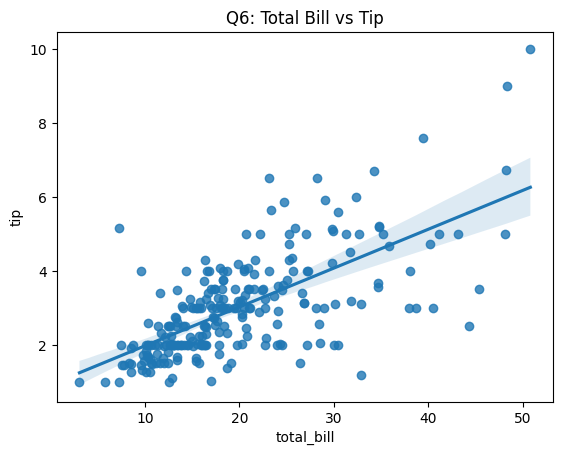

In [6]:
# Q6. Write a Python script that analyzes the relationship between total bill and tip in the 'tips' dataset using simple linear regression and visualizes the results.
sns.regplot(x='total_bill', y='tip', data=tips)
plt.title("Q6: Total Bill vs Tip")
plt.show()

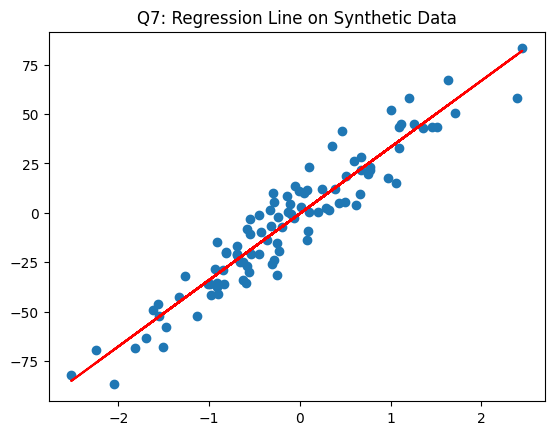

In [8]:
#Q7. Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the model to predict new values and plot the data points along with the regression line.
from sklearn.datasets import make_regression
X_syn, y_syn = make_regression(n_samples=100, n_features=1, noise=10)
model.fit(X_syn, y_syn)
plt.scatter(X_syn, y_syn)
plt.plot(X_syn, model.predict(X_syn), color='red')
plt.title("Q7: Regression Line on Synthetic Data")
plt.show()

In [10]:
# Q8. Write a Python script that pickles a trained linear regression model and saves it to a file.
import pickle
with open('linear_model.pkl', 'wb') as f:
    pickle.dump(model, f)

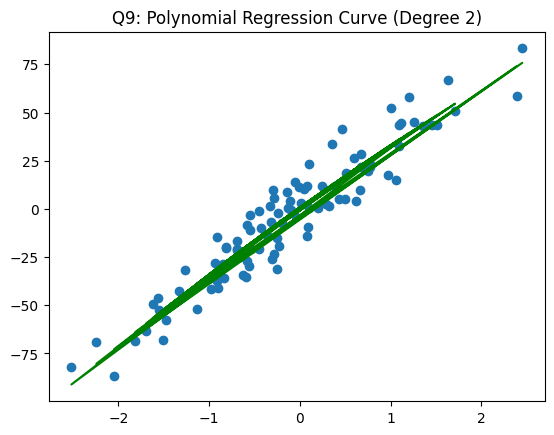

In [11]:
# Q9. Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the regression curve.
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_syn)
model.fit(X_poly, y_syn)
plt.scatter(X_syn, y_syn)
plt.plot(X_syn, model.predict(X_poly), color='green')
plt.title("Q9: Polynomial Regression Curve (Degree 2)")
plt.show()

In [12]:
# Q10. Generate synthetic data for simple linear regression and print the model's coefficient and intercept.
X_10, y_10 = make_regression(n_samples=100, n_features=1, noise=5)
model.fit(X_10, y_10)
print("Q10: Coefficient =", model.coef_[0], "Intercept =", model.intercept_)

Q10: Coefficient = 13.982926848003853 Intercept = -0.29604619525882836


In [13]:
# Q11. Write a Python script that fits polynomial regression models of different degrees and compares their performance.
for degree in range(1, 4):
    poly = PolynomialFeatures(degree)
    model_poly = LinearRegression()
    model_poly.fit(poly.fit_transform(X_syn), y_syn)
    print(f"Q11: Degree {degree} R^2 =", model_poly.score(poly.fit_transform(X_syn), y_syn))


Q11: Degree 1 R^2 = 0.9022215496058446
Q11: Degree 2 R^2 = 0.9043234265589168
Q11: Degree 3 R^2 = 0.904968360769112


In [14]:
# Q12. Write a Python script that fits a simple linear regression model with two features and prints the model's coefficients, intercept, and R-squared score.
model.fit(X, y)
print("Q12: Coefficients =", model.coef_, "Intercept =", model.intercept_, "R^2 =", model.score(X, y))

Q12: Coefficients = [0.09271334 0.19259779] Intercept = 0.6689447408125022 R^2 = 0.46786930879612587


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but LinearRegression is expecting 2 features as input.

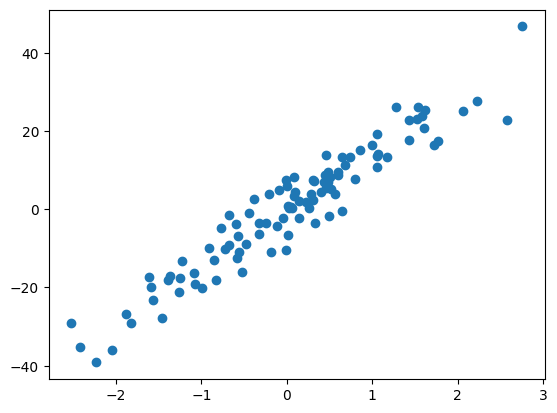

In [16]:
# Q13. Write a Python script that generates synthetic data, fits a linear regression model,
# and visualizes the regression line along with the data points.
plt.scatter(X_10, y_10)
plt.plot(X_10, model.predict(X_10), color='red')
plt.title("Q13: Regression Visualization")
plt.show()


In [17]:
# Q14. Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a dataset with multiple features.
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
X_vif = tips[['total_bill', 'size']]
X_vif['intercept'] = 1  # add constant for VIF calculation
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print("Q14: Variance Inflation Factors")
print(vif_data)

Q14: Variance Inflation Factors
      Feature       VIF
0  total_bill  1.557586
1        size  1.557586
2   intercept  8.904095


/tmp/ipython-input-17-4068249533.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_vif['intercept'] = 1  # add constant for VIF calculation


In [18]:
# Q15. Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a polynomial regression model, and plots the regression curve.
X15 = np.linspace(-3, 3, 100).reshape(-1, 1)
y15 = 3*X15**4 - 2*X15**3 + X15**2 + np.random.randn(100, 1)*10
model15 = make_pipeline(PolynomialFeatures(degree=4), LinearRegression())
model15.fit(X15, y15)
plt.scatter(X15, y15)
plt.plot(X15, model15.predict(X15), color='red')
plt.title("Q15: Polynomial Regression (Degree 4)")
plt.show()


NameError: name 'make_pipeline' is not defined

In [19]:
# Q16. Write a Python script that creates a machine learning pipeline with data standardization and a multiple linear regression model, and prints the R-squared score.
pipeline16 = Pipeline([
    ('scaler', StandardScaler()),
    ('reg', LinearRegression())
])
pipeline16.fit(X_train, y_train)
print("Q16: Pipeline R^2 Score =", pipeline16.score(X_test, y_test))


Q16: Pipeline R^2 Score = 0.4811084097989493


In [20]:
# Q17. Write a Python script that performs polynomial regression (degree 3) on a synthetic dataset and plots the regression curve.
model17 = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
model17.fit(X_syn, y_syn)
plt.scatter(X_syn, y_syn)
plt.plot(X_syn, model17.predict(PolynomialFeatures(3).fit_transform(X_syn)), color='red')
plt.title("Q17: Polynomial Regression (Degree 3)")
plt.show()

NameError: name 'make_pipeline' is not defined

In [21]:
# Q18. Write a Python script that performs multiple linear regression on a synthetic dataset with 5 features. Print the R-squared score and model coefficients.
from sklearn.datasets import make_regression
X18, y18 = make_regression(n_samples=100, n_features=5, noise=10)
model18 = LinearRegression()
model18.fit(X18, y18)
print("Q18: R^2 =", model18.score(X18, y18))
print("Q18: Coefficients =", model18.coef_)

Q18: R^2 = 0.989121188584033
Q18: Coefficients = [18.50335361 24.44572918 68.95315089  4.99399754 45.27225262]


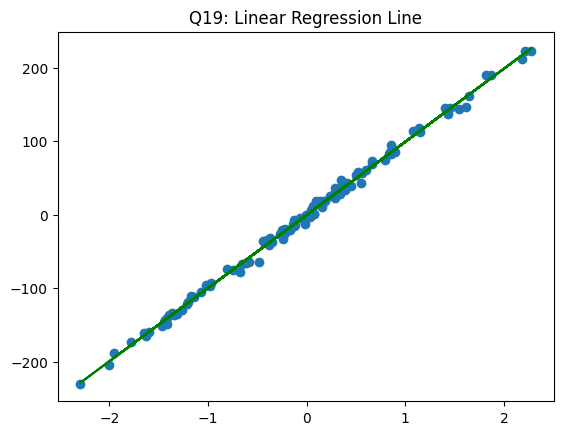

In [22]:
# Q19. Write a Python script that generates synthetic data for linear regression, fits a model, and visualizes the data points along with the regression line.
X19, y19 = make_regression(n_samples=100, n_features=1, noise=5)
model19 = LinearRegression()
model19.fit(X19, y19)
plt.scatter(X19, y19)
plt.plot(X19, model19.predict(X19), color='green')
plt.title("Q19: Linear Regression Line")
plt.show()

In [23]:
# Q20. Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's R-squared score and coefficients.
X20, y20 = make_regression(n_samples=100, n_features=3, noise=8)
model20 = LinearRegression()
model20.fit(X20, y20)
print("Q20: R^2 =", model20.score(X20, y20))
print("Q20: Coefficients =", model20.coef_)

Q20: R^2 = 0.9949396290716359
Q20: Coefficients = [73.05826057 70.10409399 76.06547994]


In [24]:
# Q21. Write a Python script that demonstrates how to serialize and deserialize machine learning models using joblib instead of pickling.
import joblib
joblib.dump(model20, 'model_joblib.pkl')
loaded_model = joblib.load('model_joblib.pkl')
print("Q21: Loaded Model R^2 =", loaded_model.score(X20, y20))

Q21: Loaded Model R^2 = 0.9949396290716359


In [25]:
# Q22. Write a Python script to perform linear regression with categorical features using one-hot encoding. Use the Seaborn 'tips' dataset.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
categorical_features = ['sex', 'smoker', 'day', 'time']
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), categorical_features)
], remainder='passthrough')
pipeline22 = make_pipeline(preprocessor, LinearRegression())
pipeline22.fit(tips[categorical_features + ['total_bill', 'size']], tips['tip'])
print("Q22: R^2 =", pipeline22.score(tips[categorical_features + ['total_bill', 'size']], tips['tip']))

Q22: R^2 = 0.47007812322060794


In [26]:
# Q23. Compare Ridge Regression with Linear Regression on a synthetic dataset and print the coefficients and R-squared score.
from sklearn.linear_model import Ridge
X23, y23 = make_regression(n_samples=100, n_features=2, noise=5)
lr = LinearRegression().fit(X23, y23)
ridge = Ridge(alpha=1.0).fit(X23, y23)
print("Q23: Linear Coefficients =", lr.coef_, "R^2 =", lr.score(X23, y23))
print("Q23: Ridge Coefficients =", ridge.coef_, "R^2 =", ridge.score(X23, y23))

Q23: Linear Coefficients = [32.84975911 95.22690612] R^2 = 0.9980979468441681
Q23: Ridge Coefficients = [32.56156243 94.1737558 ] R^2 = 0.9979818419135912


In [27]:
# Q24. Write a Python script that uses cross-validation to evaluate a Linear Regression model on a synthetic dataset.
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LinearRegression(), X23, y23, cv=5, scoring='r2')
print("Q24: Cross-Validation R^2 Scores =", scores)

Q24: Cross-Validation R^2 Scores = [0.99583559 0.99850546 0.99872082 0.99889918 0.9958746 ]


In [28]:
# Q25. Write a Python script that compares polynomial regression models of different degrees and prints the R-squared score for each.
for degree in range(1, 5):
    poly_pipeline = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_pipeline.fit(X_syn, y_syn)
    print(f"Q25: Degree {degree} R^2 =", poly_pipeline.score(X_syn, y_syn))

Q25: Degree 1 R^2 = 0.9022215496058446
Q25: Degree 2 R^2 = 0.9043234265589168
Q25: Degree 3 R^2 = 0.904968360769112
Q25: Degree 4 R^2 = 0.9053182896353382
